# 資料清理 (data cleaning)範例
使用pandas讀取資料

In [65]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv("sales_data_types.csv")

In [82]:
df.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00","$162,500.00",30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75,10,27,2015,NaN
4,651029,Harbor Co,"$15,000.00","$12,750.00",-15.00%,Closed,2,2,2014,N


通常在探索新資料前我們需要確認大致的資料型態、資料的內容與類型。

In [83]:
df.describe()

,Customer Number,Month,Day,Year
count,5.000000,5.000000,5.000000,5.00000
mean,252337.200000,4.400000,16.600000,2014.80000
std,320838.999788,3.646917,11.414903,0.83666
min,10002.000000,1.000000,2.000000,2014.00000
25%,23477.000000,2.000000,10.000000,2014.00000
50%,24900.000000,3.000000,15.000000,2015.00000
75%,552278.000000,6.000000,27.000000,2015.00000
max,651029.000000,10.000000,29.000000,2016.00000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Number  5 non-null      int64 
 1   Customer Name    5 non-null      object
 2   2016             5 non-null      object
 3   2017             5 non-null      object
 4   Percent Growth   5 non-null      object
 5   Jan Units        5 non-null      object
 6   Month            5 non-null      int64 
 7   Day              5 non-null      int64 
 8   Year             5 non-null      int64 
 9   Active           4 non-null      object
dtypes: int64(4), object(6)
memory usage: 528.0+ bytes


In [85]:
df.dtypes

Customer Number     int64
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

在未理清資料類型前，我們很難開展分析。觀察後發現有幾列的資料類型不正確:  
1. Customer Number列類型應當為整數
2. 2016，2017列代表銷售總額，應當為浮點數
3. Percent Growth需要轉換為小數，而不是百分比
4. Jan Units列類型應當是整數
5. 年月日資料是分成不同行存儲的，需要合併為一個日期列
6. Active列邏輯代表是否啟動，應當為布林值True/False  

pandas提供三種方法用於類型轉換:
- 強制類型轉換，使用astype()方法 
- 自訂轉換函數，使用apply()方法 
- pandas內置轉換函數，如to_numeric()，to_datetime()


## 類型轉換

使用`astype()`進行類型轉換。在 Pandas 中，`astype()` 函數用於將 Pandas 物件（例如 Series 或 DataFrame）的數據類型轉換為指定的數據類型。

使用 `astype()` 的語法如下：
```bash
df.astype(dtype, copy=True, errors='raise')

```
errors 參數用於如何處理錯誤，有以下幾個關鍵字：

* raise：如果有錯誤，則引發異常。
* ignore：如果有錯誤，則不做任何處理，保留原始值。
* coerce：如果有錯誤，則將無效值（例如無法轉換的字符串）設置為 NaN。

In [86]:
##transform int64 of 'Customer Number' to int32.
df['Customer Number'] = df['Customer Number'].astype('int')

In [87]:
df['Customer Number']

0     10002
1    552278
2     23477
3     24900
4    651029
Name: Customer Number, dtype: int32

## apply function review

In [73]:
#apply function
df_test = pd.DataFrame({'X': [1, 2, 3,],
                   'Y': [4, 1, 8]})
print(df_test)

   X  Y
0  1  4
1  2  1
2  3  8


In [74]:
modified_df=df_test['X'].apply(lambda x: x**2)
print(modified_df)

0    1
1    4
2    9
Name: X, dtype: int64


## 使用自訂函數於`apply`與`lambda`函數轉換2016與2017的columns
將字串類型轉換為浮點型：
 - 移除$
 - 移除,
 - 轉換為float類型

In [75]:
def convert_currency(val):
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

def convert_percentage(val):
    new_val = val.replace('%', '')
    return float(new_val)/100

In [76]:
#apply practice for functions and lambda function
df['2016'] = df['2016'].apply(convert_currency)
df['2017'] = df['2017'].apply(convert_currency)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,4.00%,75,10,27,2015,NaN
4,651029,Harbor Co,15000.0,12750.0,-15.00%,Closed,2,2,2014,N


或者使用`lambda`函數

In [88]:
df['2016'] = df['2016'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
df['2017'] = df['2017'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
df['Percent Growth'] = df['Percent Growth'].apply(lambda x:x.replace('%','')).astype('float')

In [89]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.0,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,25.0,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,4.0,75,10,27,2015,NaN
4,651029,Harbor Co,15000.0,12750.0,-15.0,Closed,2,2,2014,N


## np.where
除了自訂函數，也可以使用numpy工具庫的where函數來轉換。
`np.where()`用於根據指定的條件從兩個給定的數組中選擇元素，並返回一個新的數組，其中所選擇的元素將依據條件而定。

`np.where()` 函數的語法如下：
```bash
np.where(condition[, x, y])

其中，condition 是一個條件陣列，x 和 y 是兩個相同形狀的陣列或標量。如果只傳遞了 condition 參數，則函數會返回一個由條件 True 元素的索引構成的元組。否則，根據條件陣列的值，在 x 和 y 之間進行選擇，並返回一個新的數組。
```



In [90]:
#np.where
aa = np.arange(10)+3
print(aa)
print(np.where(aa>5,1,-1)) #if true, return 1; if false, return -1.
print(np.where(aa>5)) #if true, the value with the true index would be returned.

[ 3  4  5  6  7  8  9 10 11 12]
[-1 -1 -1  1  1  1  1  1  1  1]
(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),)


## adjustment of Active (fillna and bool transformation)
Active列邏輯代表是否啟動，應當為全部為布林值  
首先利用眾數 (mode)補值：

In [91]:
df['Active'] = df['Active'].fillna(value=df['Active'].mode()[0])
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.0,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,25.0,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,4.0,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,12750.0,-15.0,Closed,2,2,2014,N


## 利用`np.where`進行布林轉換

In [92]:
df['Active'] = np.where(df['Active'] == 'Y', True, False) 
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.0,500,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,25.0,125,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,4.0,75,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-15.0,Closed,2,2,2014,False


## 內置函數
pandas提供一些內置函數可以很方便將字串轉換為數位或者日期。  
首先，Jan Units列類型應當是整數：

In [93]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'],errors='coerce').fillna(0)
#由於傳入參數errors=coerce，對於無法轉換的資料將會填充為NaN，可以對空值填充預設值0。
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-15.0,0.0,2,2,2014,False


將年月日三列轉換為日期

In [94]:
pd.to_datetime(df[['Year','Month','Day']])

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]

In [95]:
df.insert(6, column="start_time", value=pd.to_datetime(df[['Year','Month','Day']]))
#df.insert(loc, column, value, allow_duplicates=False)
df = df.drop(['Year','Month','Day'],axis=1)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,start_time,Active
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,2015-01-10,True
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,2014-06-15,True
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,2016-03-29,True
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,2015-10-27,True
4,651029,Harbor Co,15000.0,12750.0,-15.0,0.0,2014-02-02,False


## 再次利用info查看目前的清理結果

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer Number  5 non-null      int32         
 1   Customer Name    5 non-null      object        
 2   2016             5 non-null      float64       
 3   2017             5 non-null      float64       
 4   Percent Growth   5 non-null      float64       
 5   Jan Units        5 non-null      float64       
 6   start_time       5 non-null      datetime64[ns]
 7   Active           5 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 393.0+ bytes


## 合併起來一起使用
pandas在導入資料時會自動推斷資料，同時也支援自訂資料轉換，可以通過dtype及converters屬性將轉換方法合併起來使用。  
dtype定義了某列的類型，converters屬性定義了資料轉換的方法。



In [ ]:
##tranfomr data in the intial stage
df2 = pd.read_csv("sales_data_types.csv", dtype={'Customer Number': 'int'}, converters={'2016':convert_currency,
                                                                                       '2017':convert_currency,
                                                                                       'Percent Growth':convert_percentage,
                                                                                       'Jan Units':lambda x:pd.to_numeric(x,errors='coerce'),
                                                                                       'Active':lambda x:np.where(x == 'Y', True, False) 
                                                                                       })
df2.insert(6, column="start_time", value=pd.to_datetime(df2[['Year','Month','Day']]))

## data search

In [51]:
df = pd.read_csv('http://bit.ly/kaggletrain')

print('=======use "isin" to search the indexes contained the need========')
tickets = ["SC/Paris 2123", "PC 17475"]
(df[df['Ticket'].isin(tickets)])

=======use "isin" to search the indexes contained the need========


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S


In [53]:
df.Ticket.value_counts().head()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
Name: Ticket, dtype: int64

In [59]:
print('=======find the top k values and indexes========')
top_k = 3
(df.Ticket.value_counts()[:top_k])

=======find the top k values and indexes========


347082      7
CA. 2343    7
1601        7
Name: Ticket, dtype: int64

In [57]:
f = df.Ticket.value_counts().nlargest(top_k)
f

347082      7
CA. 2343    7
1601        7
Name: Ticket, dtype: int64

In [58]:
(df[df['Ticket'].isin(f.index)].head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S


In [15]:
##another simple way
df_Ticket_count = df.Ticket.value_counts().head(top_k)
(df[df.Ticket.isin(df_Ticket_count.index)].head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S


In [ ]:
print('======find the data by regular=========')
print(df[df.Name.str.contains("Mr\.")].head())

print('===============')
df_date = pd.util.testing.makeTimeDataFrame(freq='7D')
df_date.head(10)

print(df_date.filter(regex='2000-02.*',axis=0))
print(df_date.first('3W'))

## cut function 

In [61]:
df = pd.read_csv('http://bit.ly/kaggletrain')

# 為了方便比較新舊欄位
columns = df.columns.tolist()
new_col = '年齡區間'
columns.insert(4, new_col)
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 '年齡區間',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [62]:
# 將 numerical 轉換成 categorical 欄位
labels = [f'族群 {i}' for i in range(1, 11)]
df[new_col] = pd.cut(x=df.Age, 
                     bins=10, 
                     labels=labels)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,年齡區間
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,族群 3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,族群 5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,族群 4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,族群 5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,族群 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,族群 4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,族群 3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,族群 4


In [63]:
# 可以排序切割後的 categorical 欄位
(df.sort_values(new_col, ascending=False)
   .reset_index()
   .loc[:5, columns]
)

##iterrows
#for data, row in df.iterrows():
#    print(row.Age+5)

,PassengerId,Survived,Pclass,Name,年齡區間,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",族群 10,male,80.0,0,0,27042,30.000,A23,S
1,852,0,3,"Svensson, Mr. Johan",族群 10,male,74.0,0,0,347060,7.775,NaN,S
2,457,0,1,"Millet, Mr. Francis Davis",族群 9,male,65.0,0,0,13509,26.550,E38,S
3,673,0,2,"Mitchell, Mr. Henry Michael",族群 9,male,70.0,0,0,C.A. 24580,10.500,NaN,S
4,117,0,3,"Connors, Mr. Patrick",族群 9,male,70.5,0,0,370369,7.750,NaN,Q
5,281,0,3,"Duane, Mr. Frank",族群 9,male,65.0,0,0,336439,7.750,NaN,Q


In [7]:
#將 DataFrame 隨機切成兩個子集
df_train = df.sample(frac=0.8)
df_test = df.drop(index=df_train.index)
(df_train.index, df_test.index)

(Int64Index([464,  28, 700, 675, 281, 805,   1, 196, 674, 184,
             ...
             663,  37, 848,  16, 883, 265, 827, 155, 183, 769],
            dtype='int64', length=713),
 Int64Index([  8,  11,  27,  32,  33,  36,  44,  46,  49,  52,
             ...
             829, 839, 841, 850, 851, 852, 855, 860, 871, 882],
            dtype='int64', length=178))

## data process

In [72]:
df = pd.read_csv('http://bit.ly/kaggletrain')

##find top_k values
top_k = df.Ticket.value_counts().head().reset_index() #drop=True

##set_index
df_set_index = df.set_index('Name')

In [73]:
top_k

,index,Ticket
0,347082,7
1,CA. 2343,7
2,1601,7
3,347088,6
4,3101295,6


In [74]:
df_set_index

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [22]:
##describe
sta_result = df.describe()
(sta_result.loc[['mean','min'],'Age'])

mean    29.699118
min      0.420000
Name: Age, dtype: float64

In [24]:
#找出欄位裡所有出現過的值
print(df.Sex.unique())

['male' 'female']


## apply function

In [3]:
import pandas as pd
def generation(row):
    #print(row)
    d = {'male': '男性', 'female': '女性'} 
    return f'一名{row["Age"]}歲的{d[row["Sex"]]}'

df = pd.read_csv('http://bit.ly/kaggletrain')
sur = df.Survived.apply(lambda x:'倖存' if x else '死亡')

combine = df.apply(generation,axis=1)
(combine)

0      一名22.0歲的男性
1      一名38.0歲的女性
2      一名26.0歲的女性
3      一名35.0歲的女性
4      一名35.0歲的男性
          ...    
886    一名27.0歲的男性
887    一名19.0歲的女性
888     一名nan歲的女性
889    一名26.0歲的男性
890    一名32.0歲的男性
Length: 891, dtype: object

## groupby

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
sex_pcalss_group = df.groupby(['Pclass','Sex'])
#https://zhuanlan.zhihu.com/p/101284491

In [7]:
len(sex_pcalss_group)

6

In [8]:
sex_pcalss_group.size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [25]:
sex_pcalss_group.get_group((1, "female")).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [27]:
sex_pcalss_group.Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [28]:
sex_pcalss_group.get_group((1, "female")).Age.mean()

34.61176470588235

In [20]:
(sex_pcalss_group.Survived.describe())

count      mean       std  min  25%  50%  75%  max
Pclass Sex                                                       
1      female   94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
       male    122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
2      female   76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
       male    108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
3      female  144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0
       male    347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0

In [22]:
df.groupby(["Sex", 'Pclass']).size().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


## agg function

In [26]:
df.groupby(["Sex", 'Pclass']).Age.agg(['min','max','mean'])

min   max       mean
Sex    Pclass                       
female 1       2.00  63.0  34.611765
       2       2.00  57.0  28.722973
       3       0.75  63.0  21.750000
male   1       0.92  80.0  41.281386
       2       0.67  70.0  30.740707
       3       0.42  74.0  26.507589

In [28]:
df.groupby(["Sex", 'Pclass']).Age.agg(['min','max','mean']).unstack()

min               max                   mean                      
Pclass     1     2     3     1     2     3          1          2          3
Sex                                                                        
female  2.00  2.00  0.75  63.0  57.0  63.0  34.611765  28.722973  21.750000
male    0.92  0.67  0.42  80.0  70.0  74.0  41.281386  30.740707  26.507589

In [30]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc=['min', 'max', 'count'])

min               max             count         
Pclass     1     2     3     1     2     3     1   2    3
Sex                                                      
female  2.00  2.00  0.75  63.0  57.0  63.0    85  74  102
male    0.92  0.67  0.42  80.0  70.0  74.0   101  99  253

In [27]:
df.Age.agg(['min','max','mean'])

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
f = df.groupby('Sex')

In [38]:
f.get_group('female')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [44]:
df_city = pd.DataFrame({
    'state': ['密蘇里州', '亞利桑那州', '肯塔基州', '紐約州'],
    'city': ['堪薩斯城', '鳳凰城', '路易維爾', '紐約市']
})
df_info = pd.DataFrame({
    'city': ['路易維爾', '堪薩斯城', '鳳凰城'],
    'population': [741096, 481420, 4039182],
    'feature': list('abc')})

display(df_city)
display(df_info)

,state,city
0,密蘇里州,堪薩斯城
1,亞利桑那州,鳳凰城
2,肯塔基州,路易維爾
3,紐約州,紐約市


,city,population,feature
0,路易維爾,741096,a
1,堪薩斯城,481420,b
2,鳳凰城,4039182,c


In [45]:
pd.merge(left=df_city,
         right=df_info,
         how="left", # left right outer
         on="city", # 透過此欄位合併
         indicator=True # 顯示結果中每一列的來源
)

,state,city,population,feature,_merge
0,密蘇里州,堪薩斯城,481420.0,b,both
1,亞利桑那州,鳳凰城,4039182.0,c,both
2,肯塔基州,路易維爾,741096.0,a,both
3,紐約州,紐約市,NaN,NaN,left_only


left：left outer join
right：right outer join
outer: full outer join
inner： inner join

## resample

In [47]:
df_date = pd.util.testing.makeTimeDataFrame(freq='Q').head(10) * 10

(df_date.resample('Y').A.max()
 .reset_index()
 .rename({'index': 'year'}, axis=1)
)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,year,A
0,2000-12-31,6.967427
1,2001-12-31,4.949316
2,2002-12-31,4.813887


<AxesSubplot:ylabel='Pclass'>

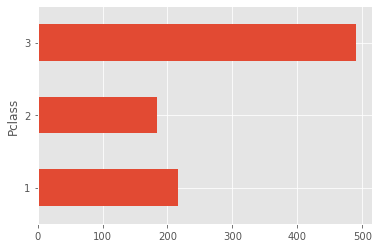

In [54]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df.groupby("Pclass").Survived.count().plot(kind='barh') #size includes NaN values, count does not:

In [55]:
df['存活'] = df.Survived.apply(lambda x: '倖存' if x else '死亡')
df.loc[:5, 'Survived':'存活']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,存活
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,死亡
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,倖存
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,倖存
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,倖存
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,死亡
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,死亡


## tqdm

## swifter

## qgrid

In [ ]:
https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html